In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from sys import stdout
from skimage.morphology import binary_opening, disk
import torch
import pandas as pd
from tqdm import tqdm
from models.unet.src.utils.dataset import AirbusUnetDataset
from utils.get_model import get_model
from utils.helpers import PATHS, multi_rle_encode
import torch.nn.functional as F
import matplotlib.pyplot as plt
import itertools
from os import path


out_path = '/zhome/82/4/212615/deep-learning-project/job_out/yolo/23247867'

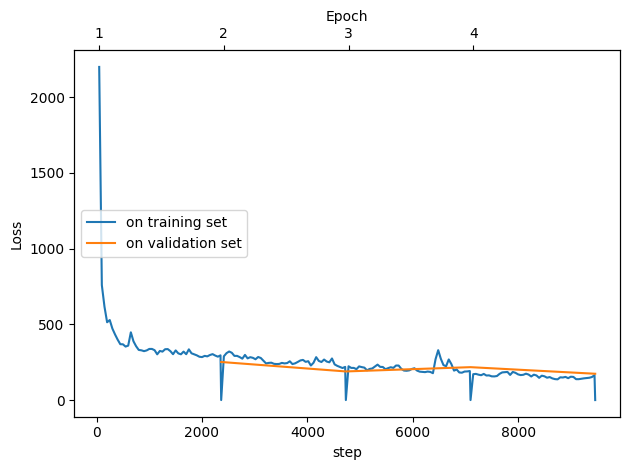

In [6]:
log_file = path.join(out_path, 'train.log')
logs = pd.read_json(log_file, lines=True)

# Steps vs training loss plot
fig, ax1 = plt.subplots()

ax1.plot(
    logs.step[logs.loss.notnull()],
    logs.loss[logs.loss.notnull()],
    label="on training set",
    color='tab:blue'
)

# Steps vs validation loss plot
ax1.plot(
    logs.step[logs.valid_loss.notnull()],
    logs.valid_loss[logs.valid_loss.notnull()],
    label="on validation set",
    color='tab:orange'
)

ax1.set_xlabel('step')
ax1.set_ylabel('Loss')
ax1.legend(loc='center left')

# Add secondary x-axis for 'epoch'
ax2 = ax1.twiny()

# Use the 'epoch' values directly from the logs DataFrame
ax2.set_xlim(ax1.get_xlim())  # Make sure the limits of the secondary x-axis match the first x-axis

# Get the steps where 'epoch' changes
epoch_changes = logs[logs['epoch'].notnull()].drop_duplicates(subset='epoch', keep='first')

# Set ticks based on the steps where 'epoch' changes
ax2.set_xticks(epoch_changes.step)

# Set labels to show the 'epoch' values only at those points
ax2.set_xticklabels(epoch_changes.epoch)

ax2.set_xlabel('Epoch')

# Tight layout and saving the figure
plt.tight_layout()